In [13]:
from model import GroceryModel
import networkx as nx
import matplotlib.pyplot as plt
import json

In [14]:
config = {
    "height": 10,
    "width": 10,
    "n_persons": 3,
    "n_items": 1,
    "grid_layout": "grids/hard_10x10.txt", 
    "avg_arrival": 10,
    "n_steps": 100,
    "speed_dist": [[1, 2], [0.5, 0.5]], # [[speed], [chances]]
    "familiar_dist": [[1, 0.6], [0.75, 0.25]]
}

# with open('config1.json', 'w') as f:
#     json.dump(config, f)

In [15]:
model = GroceryModel(config)

In [16]:
model.run_model()

0 | arrival_times: [0, 23, 24]
arriving!
chose speed: 1 and familiar: 0.6
Originally Person 8 has objs ['bread', 'chicken', 'drinks', 'exit']
After sorting person 8 has objs [('bread', (6, 2)), ('drinks', (5, 1)), ('chicken', (1, 1)), ('exit', (1, 9))]
Person 8 at (8, 9) has current obj bread at (6, 2)
planned move: [(8, 8)]
1 | arrival_times: [0, 23, 24]
Person 8 at (8, 8) has current obj bread at (6, 2)
planned move: [(7, 8)]
2 | arrival_times: [0, 23, 24]
Person 8 at (7, 8) has current obj bread at (6, 2)
planned move: [(6, 8)]
3 | arrival_times: [0, 23, 24]
Person 8 at (6, 8) has current obj bread at (6, 2)
planned move: [(6, 7)]
4 | arrival_times: [0, 23, 24]
Person 8 at (6, 7) has current obj bread at (6, 2)
planned move: [(6, 6)]
5 | arrival_times: [0, 23, 24]
Person 8 at (6, 6) has current obj bread at (6, 2)
planned move: [(6, 5)]
6 | arrival_times: [0, 23, 24]
Person 8 at (6, 5) has current obj bread at (6, 2)
planned move: [(6, 4)]
7 | arrival_times: [0, 23, 24]
Person 8 at 

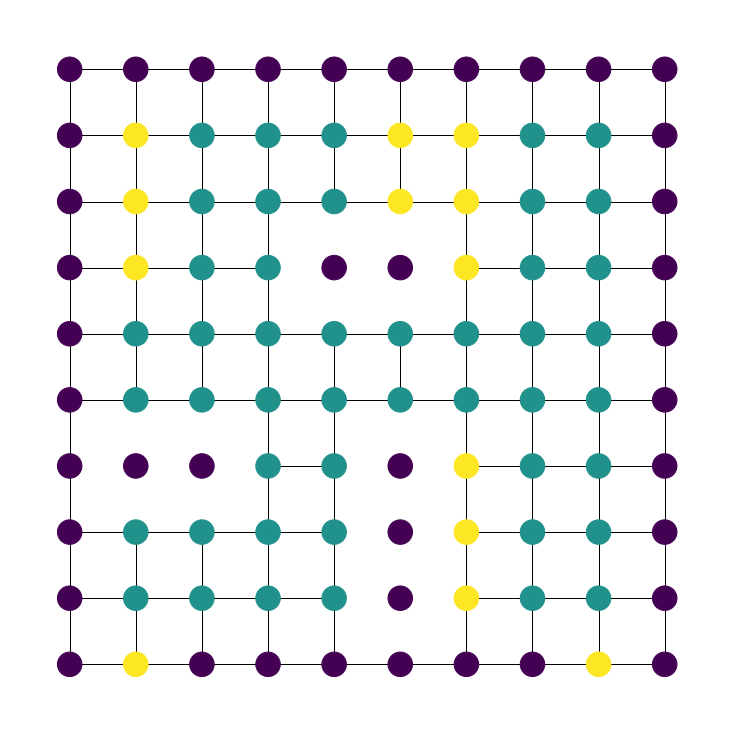

In [17]:
g = model.graph

plt.figure(figsize=(config["width"], config["height"]))
pos = {(x,y):(x,-y) for x,y in g.nodes()}

val_map = {}
for x, y in pos:
    if x == 0 or x == config["width"]-1 or y == 0 or y == config["height"]-1:
        val_map[(x,y)] = 0.0
        
    for coords in model.objectives.values():
        if (x,y) in coords:
            val_map[(x,y)] = 0.5
            
    if (x,y) in [obj.pos for obj in model.obstacles]:
        val_map[(x,y)] = 0.0
        
values = [val_map.get(node, 0.25) for node in g.nodes()]

nx.draw(g, pos=pos, 
        node_color=values, 
        node_size=600)

In [6]:
# print(g.edges)

In [7]:
data = model.datacollector.get_model_vars_dataframe()

In [18]:
print(data)

    persons                                        person_locs  \
0         1                                           [(8, 9)]   
1         1                                           [(8, 8)]   
2         1                                           [(8, 6)]   
3         1                                           [(8, 5)]   
4         1                                           [(8, 3)]   
..      ...                                                ...   
95        1  [None, None, None, None, None, None, None, Non...   
96        1  [None, None, None, None, None, None, None, Non...   
97        1  [None, None, None, None, None, None, None, Non...   
98        2  [None, None, None, None, None, None, None, Non...   
99        2  [None, None, None, None, None, None, None, Non...   

                           steps_in_stores  
0                                      [0]  
1                                      [1]  
2                                      [2]  
3                          